Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **23. listopada 2022. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

N_sample = len(y) # = 4

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
#@author Simun Sopar
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(1)
fi = poly.fit_transform(X)
print(fi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
#@author Simun Sopar
from numpy import linalg

fi_T = fi.transpose()
fi_pseudo = np.matmul(linalg.inv(np.matmul(fi_T, fi)), fi_T)
print('Pseudoinverz step-by-step:'); print(fi_pseudo)


w_first_method = np.matmul(fi_pseudo, y)
print('\nStep-by-step metodom:\n')
print('w_0 =', w_first_method[0], '\nw_1 =', w_first_method[1])

##----------------------------------------

fi_pseudo2 = linalg.pinv(fi)
print('\nPseudoinverz korištenjem funkcije pinv'); print(fi_pseudo2)

w_second_method = np.matmul(fi_pseudo2, y)
print('\nPomoću funkcije pinv:\n')
print('w_0 =', w_second_method[0], '\nw_1 =', w_second_method[1])

print('\nMatrice dobivene na ova dva načina su iste, rješenja za optimalne parametre su također ista, ' 
      'do na numeričke nepreciznosti.')

w = w_first_method

Pseudoinverz step-by-step:
[[ 0.6         0.4         0.2        -0.2       ]
 [-0.2        -0.08571429  0.02857143  0.25714286]]

Step-by-step metodom:

w_0 = 2.2000000000000024 
w_1 = 0.45714285714285685

Pseudoinverz korištenjem funkcije pinv
[[ 0.6         0.4         0.2        -0.2       ]
 [-0.2        -0.08571429  0.02857143  0.25714286]]

Pomoću funkcije pinv:

w_0 = 2.199999999999999 
w_1 = 0.4571428571428572

Matrice dobivene na ova dva načina su iste, rješenja za optimalne parametre su također ista, do na numeričke nepreciznosti.


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [5]:
#@author Simun Sopar
from sklearn.metrics import mean_squared_error

err = N_sample/2 * mean_squared_error(y, np.matmul(fi, w))
print('error =', err)

error = 4.085714285714285


Funkcija mean_squared_error koristi formulu $E(h|D) = \frac{1}{N}\sum_{i=1}^{N} (y^{(i)} - h(x^{(i)})^2$, tj. koristi drugačiji faktor skaliranja od $1/2$.

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
#@author Simun Sopar
linalg.inv(fi) #direktni inverz matrice fi

LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
#dobivamo error jer ne možemo naći inverz nekvadratne matrice, to matematički ne postoji

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
#@author Simun Sopar
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)

print('w_0 =', reg.intercept_)
print('w_1 =', reg.coef_[0], '\n')

err = 0


for i, h in enumerate(reg.predict(X)):
    err += (y[i] - h)**2

err *= 1/2
print('error =', err)

w_0 = 2.2
w_1 = 0.45714285714285713 

error = 4.085714285714286


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
#@author Simun Sopar
from numpy.random import normal

def f(x):
    #xx = x[0]
    return 5 + x - 2*x**2 - 5*x**3



def make_labels(X, f, noise=0):
    y = []
    for x in X:
        y.append(f(x[0]) + normal(0, noise))
    
    return np.array(y)

    

In [9]:
#@author Simun Sopar
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

X2 = make_instances(-5, 5, 50)


In [10]:
#@author Simun Sopar
y2 = make_labels(X2, f, noise = 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

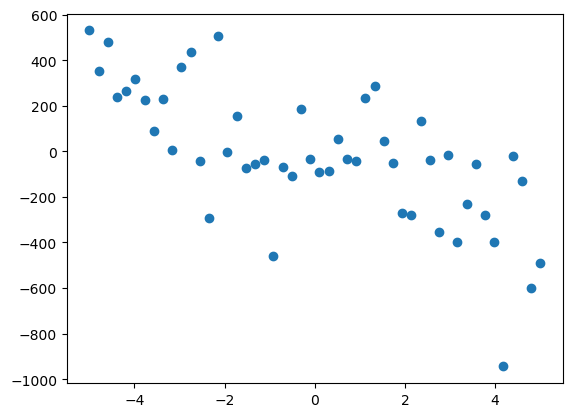

In [11]:
#@author Simun Sopar
plt.scatter(X2, y2)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Error = 997816.9601775219


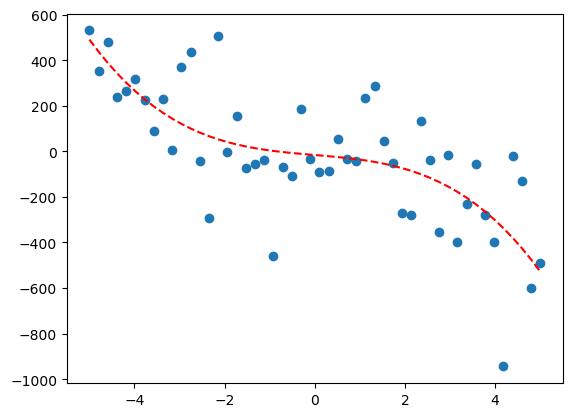

In [12]:
#@author Simun Sopar
fi = PolynomialFeatures(3).fit_transform(X2)


fi_ps = linalg.pinv(fi)
w = np.matmul(fi_ps, y2)



h = []
err = 0

for i, x in enumerate(fi):
    h.append(np.dot(x, w))
    err += (h[i] - y2[i])**2
    


err *= 1/2
print('Error =', err)

plt.scatter(X2, y2)
plt.plot(X2, h, ls='--', c='r')
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Error ( d = 1 ) = 1114175.3122392057
Error ( d = 3 ) = 997816.9601775218
Error ( d = 5 ) = 976671.0186042946
Error ( d = 10 ) = 911807.0186776178
Error ( d = 20 ) = 685364.9885513232


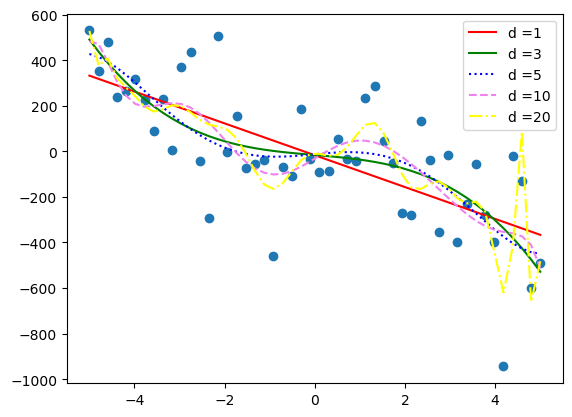

In [13]:
#@author Simun Sopar
d_mesh = [1, 3, 5, 10, 20]
c = ['red', 'green', 'blue', 'violet', 'yellow']
dot = ['-', '-', ':', '--', '-.']

for i, d in enumerate(d_mesh):
    fi = PolynomialFeatures(d).fit_transform(X2)
    w = np.matmul(linalg.pinv(fi), y2)
    h = [np.dot(w, x) for x in fi]
    plt.plot(X2, h, label='d =' + str(d), c=c[i], ls=dot[i])
    print('Error ( d =', d, ') =', 0.5*np.dot(h - y2, h - y2)) #error
    
    
plt.scatter(X2, y2) 
plt.legend()
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

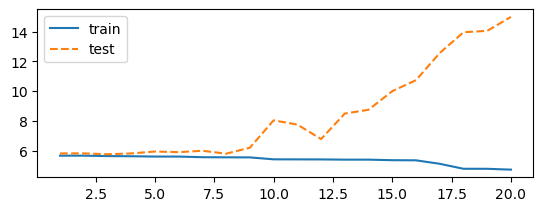

Optimalan model za d = 3


In [14]:
#@author Simun Sopar
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.5, random_state=53)
d_mesh = np.arange(1, 21, 1)
err_train = []
err_test = []


for d in d_mesh:
    fi_train = PolynomialFeatures(d, include_bias = False).fit_transform(X_train)
    reg = LinearRegression().fit(fi_train, y_train)
    
    err_train.append(0.5*np.dot(reg.predict(fi_train) - y_train, reg.predict(fi_train) - y_train))
    err_test.append(0.5*np.dot(reg.predict(PolynomialFeatures(d, include_bias = False).fit_transform(X_test)) - y_test, 
                               reg.predict(PolynomialFeatures(d, include_bias = False).fit_transform(X_test)) - y_test))
    
    #print(err)

    
    
plt.subplot(2,1,1)
plt.plot(np.array(d_mesh), np.log10(np.array(err_train)), label='train')
plt.plot(np.array(d_mesh), np.log10(np.array(err_test)), label='test', ls= '--')
plt.legend()

#plt.subplot(2,1,2)
#plt.plot(d_mesh, err_train, label='train')
#plt.plot(d_mesh, err_test, label='test', ls= '--')
#plt.legend()
#plt.xlim(1, 10)
#plt.ylim(-1e7, 1e7)


plt.show()

print('Optimalan model za d =', d_mesh[ argmin(err_test) ] )


### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

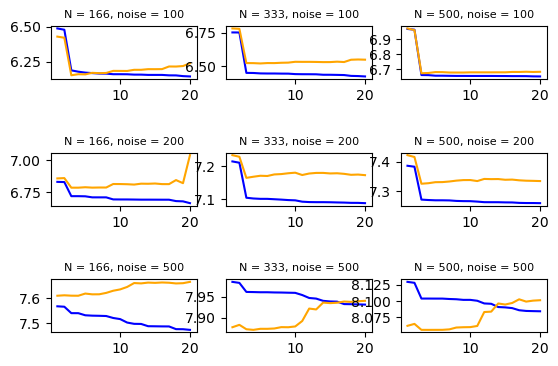

In [15]:
#@author Simun Sopar
Noise = [100, 200, 500]
#N_ = [int(50/3), int(100/3), 50]

X3 = make_instances(-5, 5, 1000)
X3a, X3b = train_test_split(X3, test_size = 0.5)

Y1 = make_labels(X3a, f, 100)   #train skupovi, X3a
Y2 = make_labels(X3a, f, 200)
Y3 = make_labels(X3a, f, 500)

Y4 = make_labels(X3b, f, 100)  #test skupovi, X3b
Y5 = make_labels(X3b, f, 200)
Y6 = make_labels(X3b, f, 500)


Y = [Y1, Y2, Y3, Y4, Y5, Y6]

for i in range(0, 3):
    for j in range(1, 4):
        err_train = []
        err_test = []
        X_train, tmp_X, y_train, tmp_y = train_test_split(X3a, Y[i], train_size = (j-0.1)/3)
        X_test, tmp_X, y_test, tmp_y = train_test_split(X3b, Y[i+3], train_size = (j-0.1)/3)
        for d in d_mesh:
            fi_train = PolynomialFeatures(d, include_bias = False).fit_transform(X_train)
            fi_test = PolynomialFeatures(d, include_bias = False).fit_transform(X_test)
            reg = LinearRegression()
            reg.fit(fi_train, y_train)    
            plt.subplot(6, 3, j + i*6)
            plt.title('N = ' + str(int(500*j/3)) + ', noise = ' + str(Noise[i]), fontsize = 8)
            err_train.append(np.dot(y_train - reg.predict(fi_train), y_train - reg.predict(fi_train)))
            err_test.append(np.dot(y_test - reg.predict(fi_test), y_test - reg.predict(fi_test)))
    
    
        plt.plot(np.array(d_mesh), np.log10(np.array(err_train)), color = 'blue')
        plt.plot(np.array(d_mesh), np.log10(np.array(err_test)), color = 'orange')

plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [16]:
#@author Simun Sopar
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

N_sample = len(y) # = 4

fi = PolynomialFeatures(3).fit_transform(X)
fi_T = fi.transpose()

unit_M = [1 for i in range(0, len(fi[0]))]
unit_M[0] = 0
unit_M = np.diag(unit_M)
#print(unit_M)
#print()

w = []
    
lam_mesh = [0,1,10]
for lambd in lam_mesh:
    w.append( np.matmul( np.matmul( linalg.inv(np.matmul(fi_T, fi) + lambd*unit_M), fi_T ), y ) )
    
for i in range(0, len(w)):
    print('Koeficijenti za lambda=', lam_mesh[i], ':' , w[i])
    
print('\nZa veći lambda težine postaju sve manje, pogotovo one težine koje se odnose na veći stupanj nelinearnosti.')

Koeficijenti za lambda= 0 : [ 4.         -5.91666667  3.375      -0.45833333]
Koeficijenti za lambda= 1 : [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Koeficijenti za lambda= 10 : [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]

Za veći lambda težine postaju sve manje, pogotovo one težine koje se odnose na veći stupanj nelinearnosti.


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [17]:
#@author Simun Sopar
from sklearn.linear_model import Ridge

fi = PolynomialFeatures(3, include_bias = False).fit_transform(X, y)

for lambd in [0, 1, 10]:
    rdg = Ridge(lambd)
    rdg.fit(fi, y)
    #print(rdg.coef_)
    print('lambda =', lambd, 'w0 =', rdg.intercept_, 'w = ', rdg.coef_)
    
print('\nOvdje se vektor w uzima bez nultog w0 člana')

lambda = 0 w0 = 3.9999999999999467 w =  [-5.91666667  3.375      -0.45833333]
lambda = 1 w0 = 3.0569614512471652 w =  [-0.69079365 -0.2831746   0.1445805 ]
lambda = 10 w0 = 2.4944418431229733 w =  [-0.15897295 -0.13423067  0.0815601 ]

Ovdje se vektor w uzima bez nultog w0 člana


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

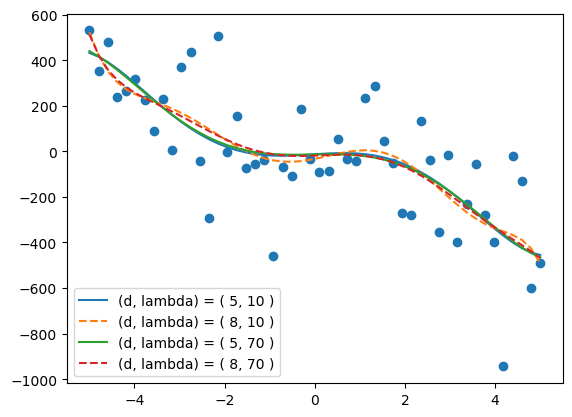

In [18]:
#@author Simun Sopar
lam_mesh = [10, 70]
d_mesh = [5, 8]

dot = ['-', '--', '-', '--']
temp = 0

for lambd in lam_mesh:
    for d in d_mesh:
        fi = PolynomialFeatures(d).fit_transform(X2, y2)
        fi_T = fi.transpose()
        unit_M = [1 for i in range(0, len(fi[0]))]
        unit_M[0] = 0; unit_M = np.diag(unit_M)
        w = np.matmul( np.matmul( linalg.inv( np.matmul(fi_T, fi) + lambd*unit_M ) , fi_T) , y2)
        plt.plot(X2, np.matmul(fi, w), label='(d, lambda) = ( ' + str(d) + ', ' + str(lambd) + ' )', ls=dot[temp])
        temp += 1

plt.scatter(X2, y2)
plt.legend()
plt.show()
        

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


Text(0.5, 1.0, 'Ispitna pogreška')

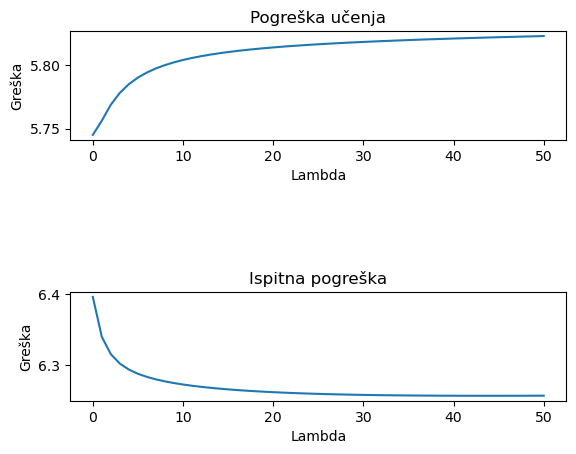

In [20]:
#@author Simun Sopar
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.5)

fi_train = PolynomialFeatures(10, include_bias = False).fit_transform(X_train)
fi_test = PolynomialFeatures(10, include_bias = False).fit_transform(X_test)


lam_mesh = np.arange(0, 51, 1)
err_train = []
err_test = []

for lambd in lam_mesh:
    rdg = Ridge(lambd)
    rdg.fit(fi_train, y_train)
    err_train.append(np.matmul(y_train - rdg.predict(fi_train), y_train - rdg.predict(fi_train)))
    err_test.append(np.matmul(y_test - rdg.predict(fi_test), y_test - rdg.predict(fi_test)))
    
plt.subplot(3,1,1)
plt.plot(lam_mesh, np.log10(np.array(err_train)))
plt.xlabel('Lambda')
plt.ylabel('Greška')
plt.title('Pogreška učenja')

plt.subplot(3,1,3)
plt.plot(lam_mesh, np.log10(np.array(err_test)))
plt.xlabel('Lambda')
plt.ylabel('Greška')
plt.title('Ispitna pogreška')
#plt.axvline(x = lam_mesh[argmin(err_test)], ls='--', color = 'black')

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [21]:
#@author FER
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

#@author Simun Sopar
def L1(vect):
    suma = 0
    for v in vect:
        suma += np.abs(v)
    return suma

def L2(vect):
    suma = 0
    for v in vect:
        suma += v**2
    return np.sqrt(suma)

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

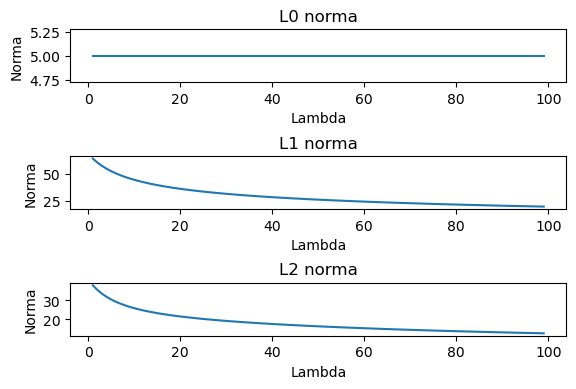

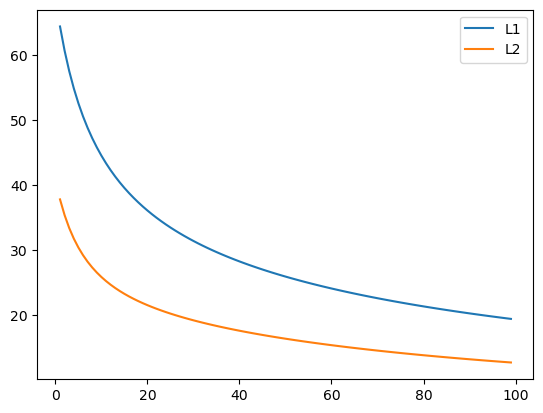

In [22]:
#@author Simun Sopar
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.5, random_state=53)

fi_train = PolynomialFeatures(5).fit_transform(X_train)
fi_test = PolynomialFeatures(5).fit_transform(X_test)

unit_M = [1 for i in range(0, len(fi_train[0]))]
unit_M[0] = 0
unit_M = np.diag(unit_M)

fi_T = fi_train.transpose()

lam_mesh = np.arange(1, 100, 1)
l0 = []; l1 = []; l2 = []

for lambd in lam_mesh:
    w = np.matmul( np.matmul( linalg.inv( np.matmul(fi_T, fi_train) + lambd*unit_M), fi_T) , y_train)
    w = [w[i] for i in range(1, len(w))]
    w = np.array(w)
    l0.append(nonzeroes(w))
    l1.append(L1(w))
    l2.append(L2(w))
    
plt.subplot(6,1,1)
plt.plot(lam_mesh, l0)
plt.title('L0 norma')
plt.xlabel('Lambda')
plt.ylabel('Norma')

plt.subplot(6,1,3)
plt.plot(lam_mesh, l1)
plt.title('L1 norma')
plt.xlabel('Lambda')
plt.ylabel('Norma')

plt.subplot(6,1,5)
plt.plot(lam_mesh, l2)
plt.title('L2 norma')
plt.xlabel('Lambda')
plt.ylabel('Norma')

plt.show()


plt.plot(lam_mesh, l1, label='L1')
plt.plot(lam_mesh, l2, label='L2')
plt.legend()
plt.show()

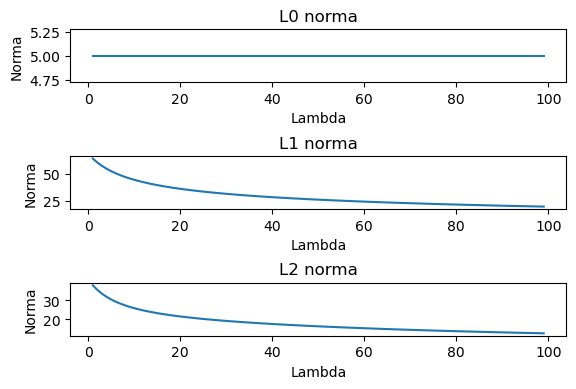

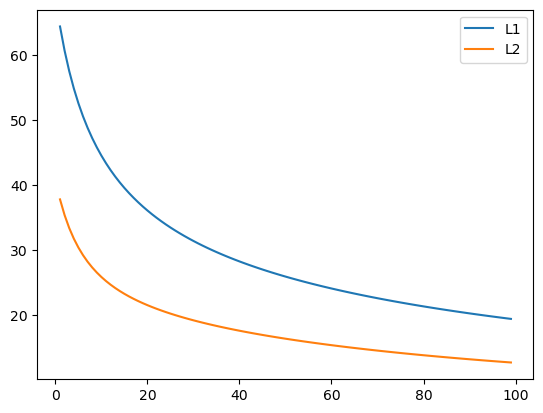

In [23]:
#@author Simun Sopar
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.5, random_state=53)

fi_train = PolynomialFeatures(5, include_bias = False).fit_transform(X_train)
fi_test = PolynomialFeatures(5, include_bias = False).fit_transform(X_test)


lam_mesh = np.arange(1, 100, 1)
l0 = []; l1 = []; l2 = []

for lambd in lam_mesh:
    rdg = Ridge(lambd)
    rdg.fit(fi_train, y_train)
    w = rdg.coef_
    l0.append(nonzeroes(w))
    l1.append(L1(w))
    l2.append(L2(w))
    
plt.subplot(6,1,1)
plt.plot(lam_mesh, l0)
plt.title('L0 norma')
plt.xlabel('Lambda')
plt.ylabel('Norma')

plt.subplot(6,1,3)
plt.plot(lam_mesh, l1)
plt.title('L1 norma')
plt.xlabel('Lambda')
plt.ylabel('Norma')

plt.subplot(6,1,5)
plt.plot(lam_mesh, l2)
plt.title('L2 norma')
plt.xlabel('Lambda')
plt.ylabel('Norma')

plt.show()


plt.plot(lam_mesh, l1, label='L1')
plt.plot(lam_mesh, l2, label='L2')
plt.legend()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

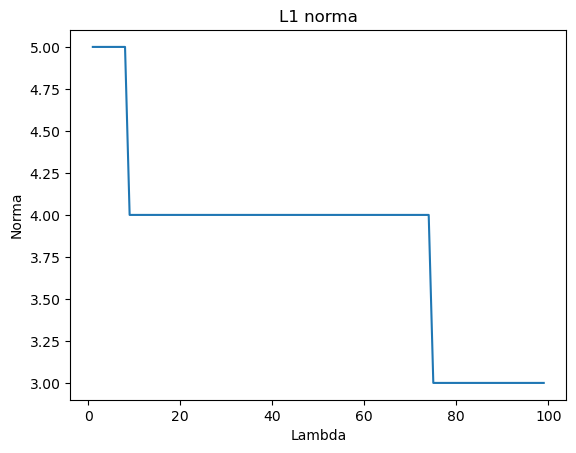

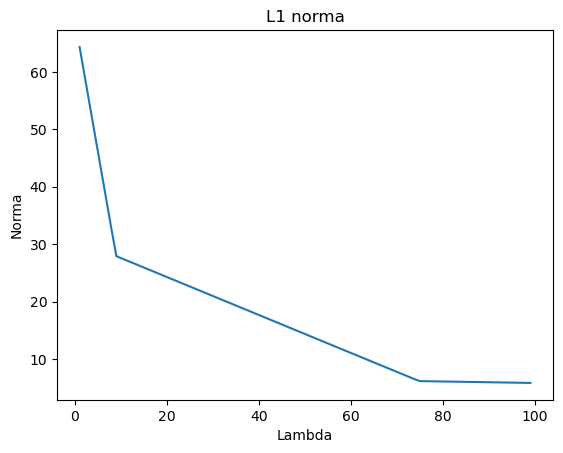

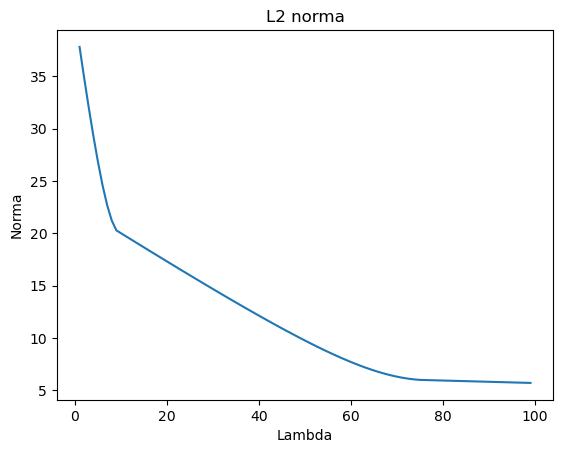

In [26]:
#@author Simun Sopar
from sklearn.linear_model import Lasso

l0 = []; l1 = []; l2 = []

fi_train = PolynomialFeatures(5, include_bias = False).fit_transform(X_train)



for lambd in lam_mesh:
    lss = Lasso(lambd, tol=1e-4, max_iter = 10000)
    lss.fit(fi_train, y_train)
    w = lss.coef_
    #print(w, lambd)
    l0.append(nonzeroes(w))
    l1.append(L1(w))
    l2.append(L2(w))
    

plt.plot(lam_mesh, l0, label = 'L1')
plt.title('L1 norma')
plt.xlabel('Lambda')
plt.ylabel('Norma')
plt.show()    
    
plt.plot(lam_mesh, l1)
plt.title('L1 norma')
plt.xlabel('Lambda')
plt.ylabel('Norma')
plt.show()

plt.plot(lam_mesh, l2)
plt.title('L2 norma')
plt.xlabel('Lambda')
plt.ylabel('Norma')
plt.show()


### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [49]:
#@author FER
n_data_points = 500
np.random.seed(71)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T  #.T = .traspose()

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

Text(0, 0.5, 'Ocjena studija')

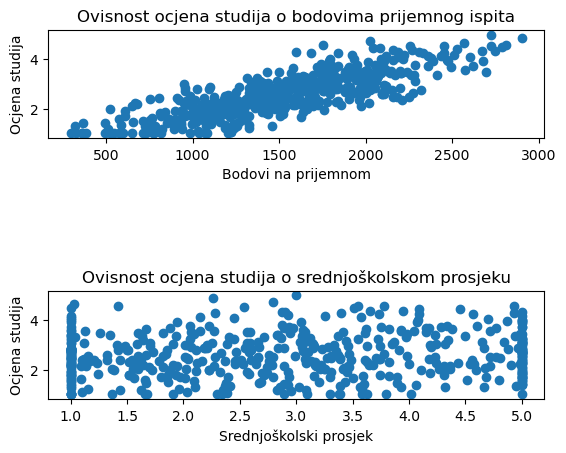

In [50]:
#@author Simun Sopar
plt.subplot(3,1,1)
plt.scatter(grades_X[:, 0], grades_y)
plt.title('Ovisnost ocjena studija o bodovima prijemnog ispita')
plt.xlabel('Bodovi na prijemnom')
plt.ylabel('Ocjena studija')

plt.subplot(3,1,3)
plt.scatter(grades_X[:, 1], grades_y)
plt.title('Ovisnost ocjena studija o srednjoškolskom prosjeku')
plt.xlabel('Srednjoškolski prosjek')
plt.ylabel('Ocjena studija')

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [51]:
#@author Simun Sopar
rdg = Ridge(0.01)
rdg.fit(PolynomialFeatures(1, include_bias = False).fit_transform(grades_X), grades_y)


print('w0 =', rdg.intercept_)
print('w =', rdg.coef_)

w0 = 0.06932167661082511
w = [0.00144951 0.10371296]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [52]:
#@author Simun Sopar
grades_y_2 = np.array([[y] for y in grades_y])


In [53]:
#@author Simun Sopar
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()


grades_X_fixed = scaler.fit_transform(grades_X)


scaler.fit(grades_y_2)
grades_y_fixed = scaler.transform(grades_y_2)

In [54]:
#@author Simun Sopar
grades_y_fixed_2 = np.array([y[0] for y in grades_y_fixed])

In [55]:
#@author Simun Sopar
rdg = Ridge(0.01)
grades_y_fixed = grades_y_fixed_2
rdg.fit(grades_X_fixed, grades_y_fixed)

print('(w1, w2) =', rdg.coef_)
print('w0 =',rdg.intercept_)
print('w0 je praktički nula')

(w1, w2) = [0.82741153 0.16061506]
w0 = -1.674518802807303e-16
w0 je praktički nula


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *6b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [56]:
#@author Simun Sopar
grades_X_fixed_colinear = [[grades_X_fixed[i][0], grades_X_fixed[i][1], grades_X_fixed[i][1]]
for i in range(0, len(grades_X_fixed))]

grades_X_fixed_colinear = np.array(grades_X_fixed_colinear)
grades_X_fixed_colinear

array([[-0.47646698, -0.65715637, -0.65715637],
       [-1.23531155, -0.60366845, -0.60366845],
       [-0.49037251,  0.23851282,  0.23851282],
       ...,
       [ 1.0610872 , -1.31546399, -1.31546399],
       [ 1.05314118, -0.50880504, -0.50880504],
       [-0.1923969 ,  0.6032834 ,  0.6032834 ]])

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [57]:
#@author Simun Sopar
rdg = Ridge(0.01)
rdg.fit(grades_X_fixed_colinear, grades_y_fixed)

print(rdg.coef_)
print(rdg.intercept_)

[0.82741164 0.08030834 0.08030834]
-1.4877615235480907e-16


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [64]:
#@author Simun Sopar
import statistics as stat


W_LIST_1 = []
W_LIST_2 = []

rdg1 = Ridge(0.01)
xxtr, xxts, yytr, yyts = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size = 0.000001)
#rdg1.fit(xxtr, yytr)
rdg1.fit(grades_X_fixed_colinear, grades_y_fixed)
print(rdg1.intercept_)

for i in range(0, 10):
    gradX1, gradX2, gradY1, gradY2 = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size = 0.5)
    rdg1 = Ridge(0.01)
    rdg2 = Ridge(1000)
    rdg1.fit(gradX1, gradY1)
    rdg2.fit(gradX2, gradY2)
    w1 = np.r_[rdg1.intercept_, rdg1.coef_]
    w2 = np.r_[rdg2.intercept_, rdg2.coef_]
    W_LIST_1.append(w1.tolist())
    W_LIST_2.append(w2.tolist())
    
    #print(rdg1.intercept_)
    print('Ponavljanje ' + str(i) + ':')
    print('Za lambda = 0.01, w =' + str(w1))
    print('Za lambda = 1000, w =' + str(w2) + '\n')


for i in range(0, 3):   
    print('Za lambda = 0.01, standardna derivacija od w' + str(i) + ' = ' + str(stat.stdev(np.array(W_LIST_1).T[i])))
    print('Za lambda = 1000, standardna derivacija od w' + str(i) + ' = ' + str(stat.stdev(np.array(W_LIST_2).T[i])) + '\n')

-1.4877615235480907e-16
Ponavljanje 0:
Za lambda = 0.01, w =[0.0309617  0.84952577 0.10038979 0.10038979]
Za lambda = 1000, w =[-0.02387207  0.15646177  0.0032501   0.0032501 ]

Ponavljanje 1:
Za lambda = 0.01, w =[-0.00531074  0.81962152  0.07642135  0.07642135]
Za lambda = 1000, w =[-0.04150266  0.1600301   0.01805583  0.01805583]

Ponavljanje 2:
Za lambda = 0.01, w =[-0.01577105  0.83329545  0.06537268  0.06537268]
Za lambda = 1000, w =[-0.04712523  0.15533344  0.02523389  0.02523389]

Ponavljanje 3:
Za lambda = 0.01, w =[0.03181279 0.84176901 0.10037945 0.10037945]
Za lambda = 1000, w =[0.00111718 0.15908891 0.00387849 0.00387849]

Ponavljanje 4:
Za lambda = 0.01, w =[0.03601393 0.80810132 0.07881237 0.07881237]
Za lambda = 1000, w =[-0.05336218  0.17528381  0.01497129  0.01497129]

Ponavljanje 5:
Za lambda = 0.01, w =[0.02259888 0.86727014 0.08773894 0.08773894]
Za lambda = 1000, w =[-0.02746316  0.14667282  0.02757324  0.02757324]

Ponavljanje 6:
Za lambda = 0.01, w =[0.01508397 

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.